<a href="https://colab.research.google.com/github/clearf29/Titanic-Practice/blob/main/Predictions_for_New_York_Train_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Science and Machine Learning Project
# Ochieng Francis
# New York Train Fare Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import files
# uploaded=files.upload()
# trainfare=pd.read_csv('train.csv')
trainfare.head()
trainfare.describe()
trainfare.shape
# datapreprocessing and cleaning
trainfare.head()
trainfare.describe()
trainfare.shape
trainfare=trainfare[trainfare['fare_amount']>0]
trainfare.duplicated().sum()
trainfare.isnull().sum()
trainfare=trainfares[trainfare['passenger_count']>0]
trainfare.shape
trainfare.describe()

NameError: ignored

In [ ]:
# removing coordinates not within New York
trainfare = trainfare[trainfare['pickup_longitude'] <= -71.4725]
trainfare= trainfare[trainfare['pickup_longitude'] >= -79.4554]

trainfare = trainfare[trainfare['pickup_latitude'] <= 45.0042]
trainfare= trainfare[trainfares['pickup_latitude'] >= 40.2940]

trainfare= trainfare[trainfare['dropoff_longitude'] <= -71.4725]
trainfare =trainfare[trainfare['dropoff_longitude'] >= -79.4554]

trainfare= trainfare[trainfare['dropoff_latitude'] <= 45.0042]
trainfare= trainfare[trainfare['dropoff_latitude'] >= 40.2940]
trainfare.shape
trainfare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,48787.000000,48787.000000,48787.000000,48787.000000,48787.000000,48787.000000
mean,11.366355,-73.975165,40.751241,-73.973969,40.751702,1.674790
std,9.661091,0.040854,0.032924,0.039293,0.035971,1.288819
min,0.010000,-75.423848,40.307765,-75.354559,40.316153,1.000000
25%,6.000000,-73.992309,40.736523,-73.991332,40.735926,1.000000
50%,8.500000,-73.982122,40.753452,-73.980490,40.754130,1.000000
75%,12.500000,-73.968379,40.767783,-73.965334,40.768482,2.000000
max,200.000000,-72.856968,43.098708,-72.854940,43.415190,6.000000


In [ ]:
def haversine(pickup_longitude , pickup_latitude, dropoff_longitude, dropoff_latitude):
    earth_radius = 6371
    pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude = map(math.radians, [pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude])
    lon_diff = dropoff_longitude - pickup_longitude
    lat_diff = dropoff_latitude - pickup_latitude
    
    a= pow(math.sin(lat_diff/2), 2) + math.cos(pickup_latitude) * math.cos(dropoff_latitude) * pow(math.sin(lon_diff/2), 2)
    c= 2 * math.asin(math.sqrt(a))
    distances = earth_radius * c
    
    return distances
distances_array = []

for i in range(trainfare.shape[0]):
     pickup_longitude = trainfare.iloc[i]['pickup_longitude']
     pickup_latitude = trainfare.iloc[i]['pickup_latitude']
     dropoff_longitude = trainfare.iloc[i]['dropoff_longitude']
     dropoff_latitude = trainfare.iloc[i]['dropoff_latitude']
     distances = haversine(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
     distances_array.append(distances)
    
trainfare['distance in kilometres'] = distances_array
trainfare
trainfare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance in kilometres
count,48255.000000,48255.000000,48255.000000,48255.000000,48255.000000,48255.000000,48255.000000
mean,11.367828,-73.975478,40.751175,-73.974269,40.751641,1.676158,3.399044
std,9.559983,0.038775,0.031736,0.037119,0.034921,1.290360,3.986867
min,0.010000,-75.423848,40.307765,-75.354559,40.316153,1.000000,0.000084
25%,6.000000,-73.992328,40.736529,-73.991340,40.735933,1.000000,1.288260
50%,8.500000,-73.982141,40.753467,-73.980515,40.754148,1.000000,2.186681
75%,12.500000,-73.968515,40.767798,-73.965510,40.768516,2.000000,3.973151
max,200.000000,-72.856968,43.098708,-72.854940,43.415190,6.000000,122.230734


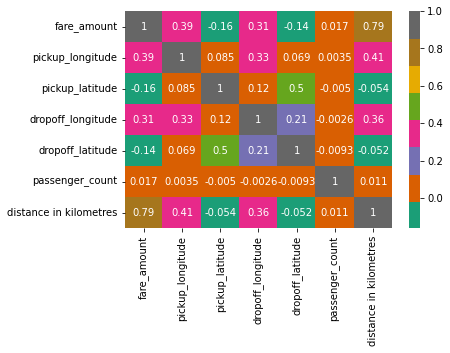

In [ ]:
 trainfare = trainfare[trainfare['distance in kilometres']>0]
#  Checking for correlation
corr_matrix=trainfare.corr()
# Data visualization
sns.heatmap(corr_matrix,annot=True,cmap='Dark2')

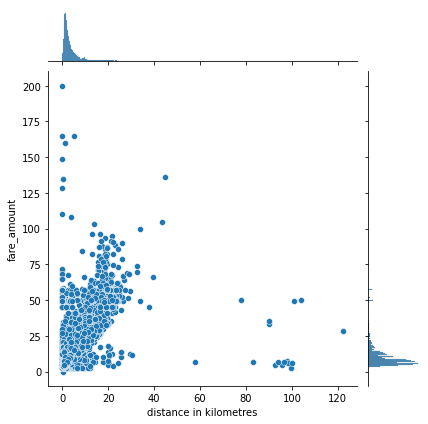

In [ ]:
sns.jointplot(x='distance in kilometres',y='fare_amount',data=trainfares,kind='scatter')

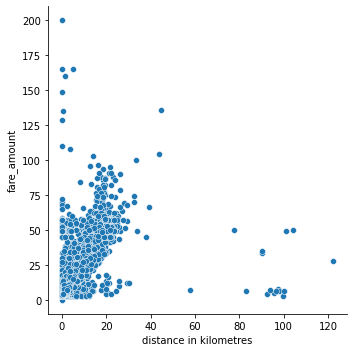

In [ ]:
sns.relplot(data=trainfares,x='distance in kilometres',y='fare_amount')

In [ ]:
# Data Modelling
w=trainfare['distance in kilometres'].to_frame()
z=trainfare['fare_amount']
from sklearn.model_selection import train_test_split
W_train,w_test,z_train,z_test=train_test_split(w,z,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
#creating a model
#instanciate our model
linear=LinearRegression()
#train 
linear.fit(w_train,z_train)
#test it
predictions=linear.predict(w_test)
#evaluate
error=mean_squared_error(z_test, predictions)
err=mean_absolute_error(z_test,predictions)
print(error)
print(err)

34.93767479714931
2.7485870306497207
